In [66]:

# 1	Load & inspect
# 2	Descriptive stats
# 3	Visualizations
# 4	Compare income vs features
# 5	Handle missing values, outliers, encode features
# 6	Advanced analysis: correlations, groupby
# 7	Save for next stages (upload/Snowflake)

from google.colab import files
uploaded = files.upload()

Saving adult_tr.csv to adult_tr (3).csv


In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('adult_tr.csv')


In [68]:
print(df.head())


   age workclass  final_weight     education  education-num  \
0   43   Private         34278  Some-college             10   
1   23   Private        244698       5th-6th              3   
2   39   Private        118286  Some-college             10   
3   35   Private        126675       HS-grad              9   
4   66   Private         28367     Bachelors             13   

       marital_status       occupation    relationship   race   sex  \
0  Married-civ-spouse            Sales         Husband  White  Male   
1       Never-married  Farming-fishing  Other-relative  White  Male   
2  Married-civ-spouse            Sales         Husband  Black  Male   
3            Divorced     Craft-repair   Not-in-family  White  Male   
4  Married-civ-spouse  Priv-house-serv  Other-relative  White  Male   

   capital_gain  capital_loss  hours_per_week native_country  threshold  
0             0             0              35  United-States          0  
1             0             0              35 

In [69]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36631 entries, 0 to 36630
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36631 non-null  int64 
 1   workclass       36631 non-null  object
 2   final_weight    36631 non-null  int64 
 3   education       36631 non-null  object
 4   education-num   36631 non-null  int64 
 5   marital_status  36631 non-null  object
 6   occupation      36631 non-null  object
 7   relationship    36631 non-null  object
 8   race            36631 non-null  object
 9   sex             36631 non-null  object
 10  capital_gain    36631 non-null  int64 
 11  capital_loss    36631 non-null  int64 
 12  hours_per_week  36631 non-null  int64 
 13  native_country  36631 non-null  object
 14  threshold       36631 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.2+ MB
None


In [70]:

print(df.describe(include='all'))


                 age workclass  final_weight education  education-num  \
count   36631.000000     36631  3.663100e+04     36631   36631.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     25425           NaN     11836            NaN   
mean       38.663946       NaN  1.898852e+05       NaN      10.079004   
std        13.731151       NaN  1.058737e+05       NaN       2.565630   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.177890e+05       NaN       9.000000   
50%        37.000000       NaN  1.782820e+05       NaN      10.000000   
75%        48.000000       NaN  2.373190e+05       NaN      12.000000   
max        90.000000       NaN  1.490400e+06       NaN      16.000000   

            marital_status      occupation relationship   race    sex  \
count                36631           36631        

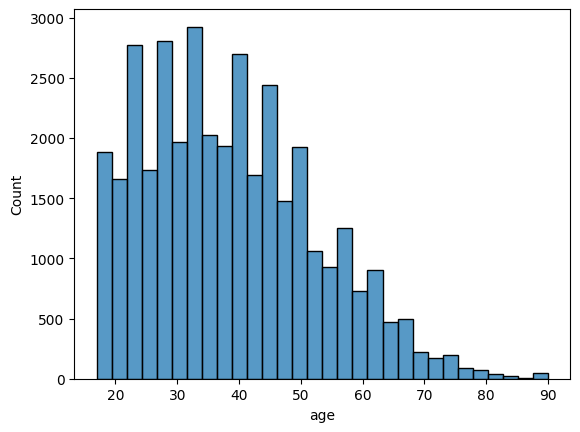

In [71]:
sns.histplot(df['age'], bins=30)
plt.show()

In [72]:
#zero represents less than or equal to 50k and 1 represents greater than 50k
print(df['threshold'].unique())
print(df['threshold'].value_counts())


[0 1]
threshold
0    27866
1     8765
Name: count, dtype: int64


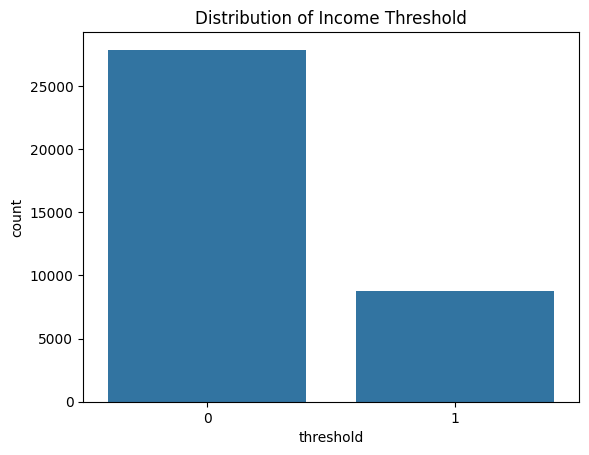

In [73]:
sns.countplot(x='threshold', data=df)
plt.title("Distribution of Income Threshold")
plt.show()

In [74]:
print(df.isnull().sum())
print(df.isna().mean().sort_values(ascending=False))  # Percent of missing values


age               0
workclass         0
final_weight      0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
threshold         0
dtype: int64
age               0.0
workclass         0.0
final_weight      0.0
education         0.0
education-num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
threshold         0.0
dtype: float64


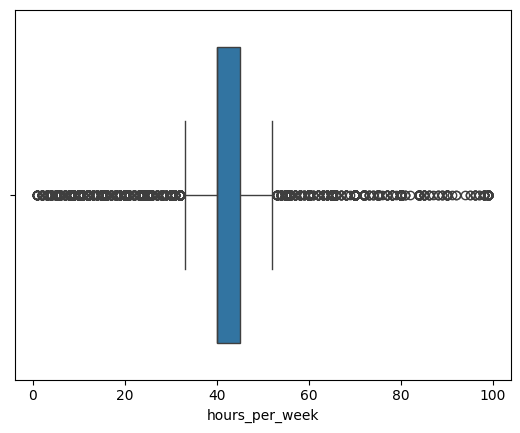

In [75]:
# Visual check
sns.boxplot(x=df['hours_per_week'])

# Programmatic removal (optional)
Q1 = df['hours_per_week'].quantile(0.25)
Q3 = df['hours_per_week'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['hours_per_week'] >= Q1 - 1.5 * IQR) & (df['hours_per_week'] <= Q3 + 1.5 * IQR)]


In [76]:
# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


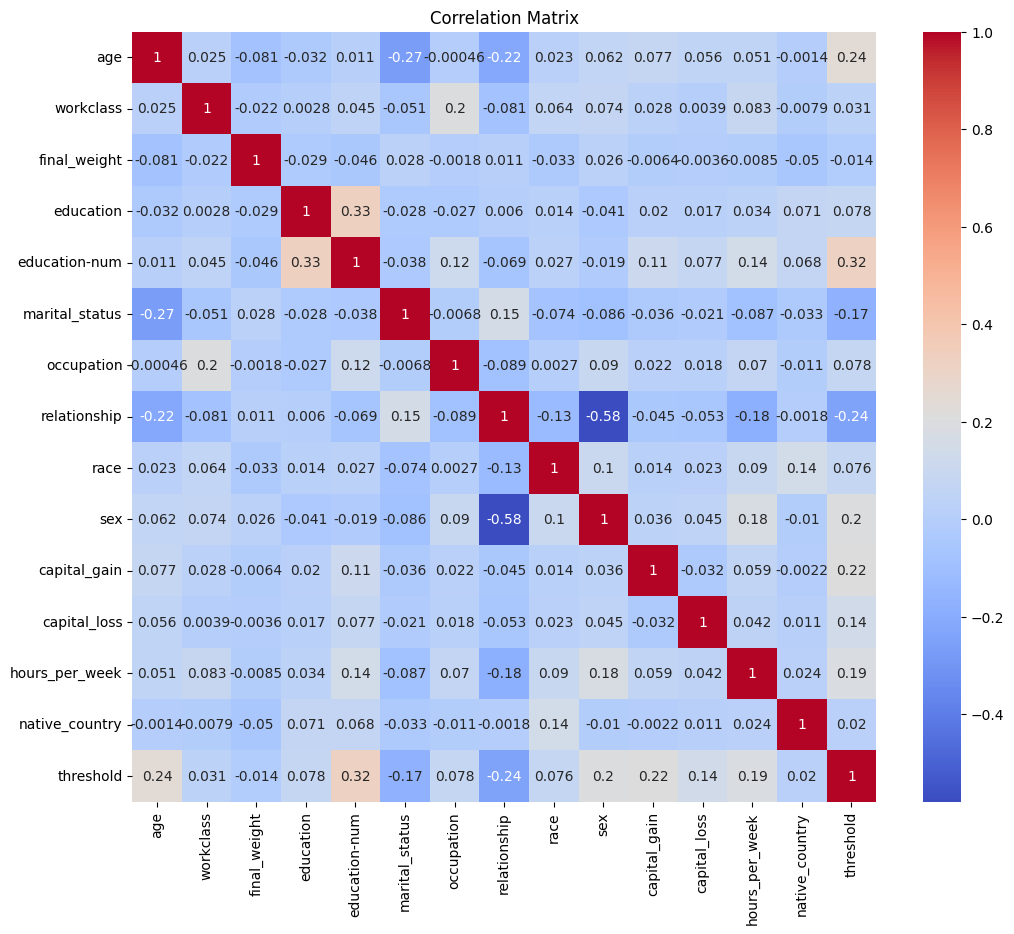

In [77]:
#Feature Correlation Analysis
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

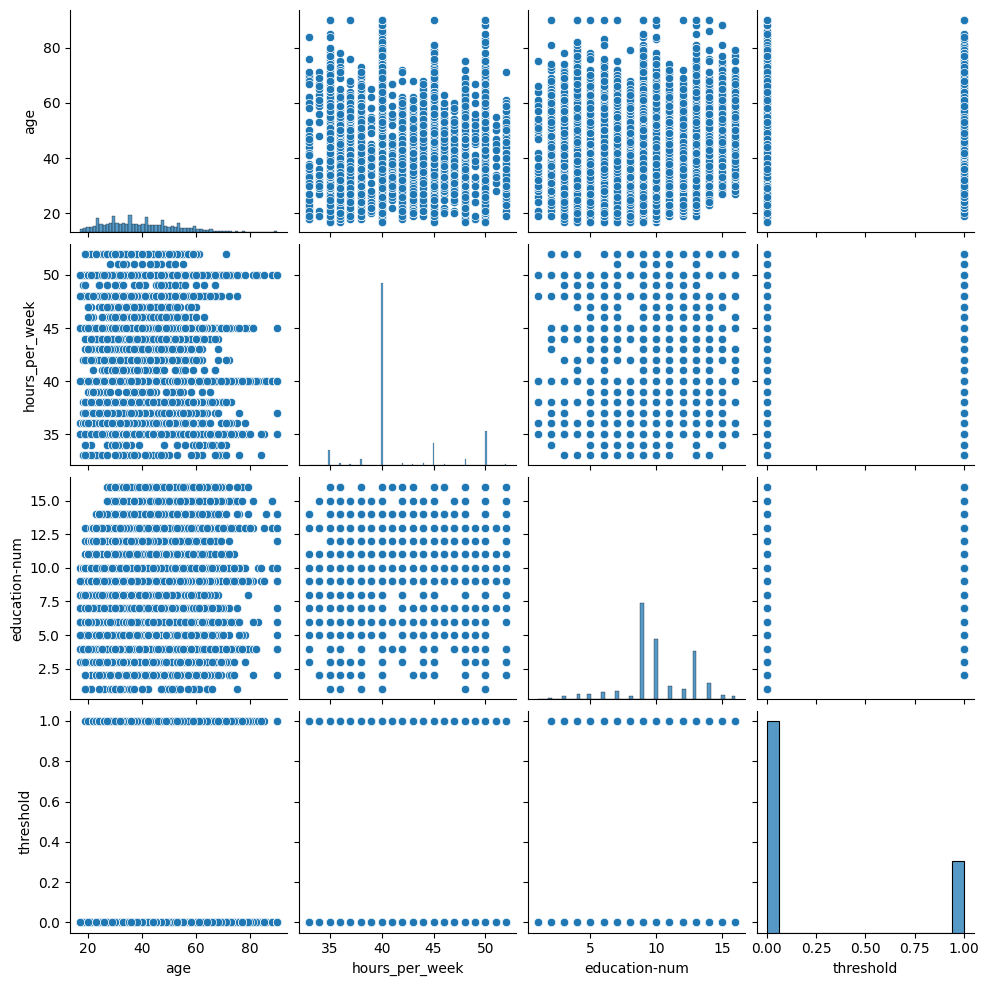

In [78]:
sns.pairplot(df[['age', 'hours_per_week', 'education-num', 'threshold']])


In [79]:
print(df.groupby('education')['threshold'].value_counts(normalize=True))
print(df.groupby('sex')['hours_per_week'].mean())


education  threshold
0          0            0.926866
           1            0.073134
1          0            0.942783
           1            0.057217
2          0            0.906355
           1            0.093645
3          0            0.976744
           1            0.023256
4          0            0.952542
           1            0.047458
5          0            0.932238
           1            0.067762
6          0            0.957447
           1            0.042553
7          0            0.726043
           1            0.273957
8          0            0.737226
           1            0.262774
9          0            0.574148
           1            0.425852
10         1            0.764493
           0            0.235507
11         0            0.830471
           1            0.169529
12         1            0.551326
           0            0.448674
13         0            1.000000
14         1            0.768617
           0            0.231383
15         0          

In [80]:
df = df.sort_values(by='age')
df.reset_index(drop=True, inplace=True)
df.index += 1

df.head(15)

,age,workclass,final_weight,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,threshold
1,17,0,144114,0,6,4,0,3,4,1,0,0,40,39,0
2,17,4,317702,6,5,4,8,3,2,0,0,0,40,39,0
3,17,4,354201,11,9,4,8,3,4,1,0,0,40,39,0
4,17,0,67808,0,6,4,0,3,4,1,0,0,40,39,0
5,17,4,58037,0,6,4,8,3,4,1,0,0,40,39,0
6,17,4,239947,1,7,4,1,3,4,1,0,0,40,39,0
7,17,6,181317,0,6,4,5,3,4,1,0,0,35,39,0
8,17,4,96354,1,7,4,8,3,4,1,0,0,40,39,0
9,17,0,237078,1,7,4,0,3,4,0,0,0,35,39,0
10,17,4,33611,1,7,4,8,3,4,1,0,0,40,39,0


In [81]:
print(df.columns.tolist())

df.drop(columns=['final_weight', 'native_country', 'education-num'], inplace=True, errors='ignore')



['age', 'workclass', 'final_weight', 'education', 'education-num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'threshold']


In [82]:
df.to_csv('eda_cleaned_adult.csv', index=False)


In [83]:
from google.colab import files
files.download('eda_cleaned_adult.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>